In [1]:
import numpy as np, prjlib, plottools as pl, healpy as hp, pickle, curvedsky, quad_func, misctools, tools_lens, tools_delens, tools_multitracer
from matplotlib.pyplot import *

In [2]:
snmin, snmax = 1, 100
olmax = 1024
klist = ['comb']

In [3]:
Wsa, __ = prjlib.window('sa',512)
pid = prjlib.analysis_init(t='id',ntype='cv',snmin=snmin,snmax=snmax)

/global/homes/t/toshiyan/.local/lib/python3.7/site-packages/healpy/fitsfunc.py:369: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  "If you are not specifying the input dtype and using the default "


SAT mask is further multiplied by hit-count binary


/global/homes/t/toshiyan/.local/lib/python3.7/site-packages/healpy/fitsfunc.py:391: UserWarning: NSIDE = 512
  warnings.warn("NSIDE = {0:d}".format(nside))
/global/homes/t/toshiyan/.local/lib/python3.7/site-packages/healpy/fitsfunc.py:400: UserWarning: ORDERING = RING in fits file
  warnings.warn("ORDERING = {0:s} in fits file".format(ordering))
/global/homes/t/toshiyan/.local/lib/python3.7/site-packages/healpy/fitsfunc.py:428: UserWarning: INDXSCHM = IMPLICIT
  warnings.warn("INDXSCHM = {0:s}".format(schm))


In [4]:
d = prjlib.data_directory()
dobj = {}
for ntype in ['base','goal']:
    p = prjlib.analysis_init(t='la',freq='com',fltr='none',snmin=snmin,snmax=snmax,ntype=ntype+'_roll50')
    pE = prjlib.analysis_init(t='co',freq='com',fltr='cinv',ntype=ntype+'_roll50')
    qobj = tools_lens.init_qobj(p.stag,'False',rlmin=300,rlmax=4096)
    mobj = tools_multitracer.mass_tracer(p,qobj,add_cmb=['TT','TE','EE','EB'])
    dobj[ntype] = tools_delens.init_template(p.stag+qobj.ltag,mobj.klist,pE.stag,False,klist=klist,kfltr='none',elmin=50)

{'TT': 0, 'TE': 1, 'EE': 2, 'EB': 3, 'g0': 4, 'g1': 5, 'g2': 6, 'g3': 7, 'g4': 8, 'g5': 9, 'cib': 10}
{'TT': 0, 'TE': 1, 'EE': 2, 'EB': 3, 'g0': 4, 'g1': 5, 'g2': 6, 'g3': 7, 'g4': 8, 'g5': 9, 'cib': 10}


In [7]:
print(dobj['base'].falm['comb'][1])
print(dobj['goal'].falm['comb'][1])

/project/projectdirs/sobs/delensing/delensb/alm/alm_comb_le50-2048_lk20-2048_none_lacom_base_roll50_mv3_a5.0deg_none_l300-4096_TT-TE-EE-EB-g0-g1-g2-g3-g4-g5-cib_cocom_base_roll50_cinv_0001.pkl
/project/projectdirs/sobs/delensing/delensb/alm/alm_comb_le50-2048_lk20-2048_none_lacom_goal_roll50_mv3_a5.0deg_none_l300-4096_TT-TE-EE-EB-g0-g1-g2-g3-g4-g5-cib_cocom_goal_roll50_cinv_0001.pkl


/global/homes/t/toshiyan/.local/lib/python3.7/site-packages/healpy/projaxes.py:920: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_over(newcm(1.0))
/global/homes/t/toshiyan/.local/lib/python3.7/site-packages/healpy/projaxes.py:921: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_under(bgcolor)
/global/homes/t/toshiyan/.local/lib/python3.7/site-packages/healpy/projaxes.py:922: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you

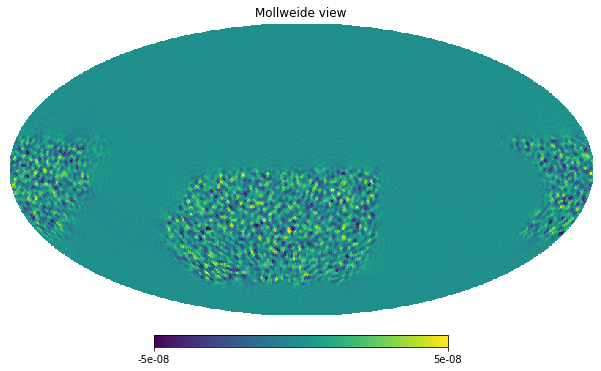

In [8]:
olmax = 128
dalm = pickle.load(open(dobj['goal'].falm['comb'][1],"rb"))[0:olmax+1,0:olmax+1]
dmap = curvedsky.utils.hp_alm2map(56,olmax,olmax,dalm)
hp.mollview(dmap,min=-5e-8,max=5e-8)

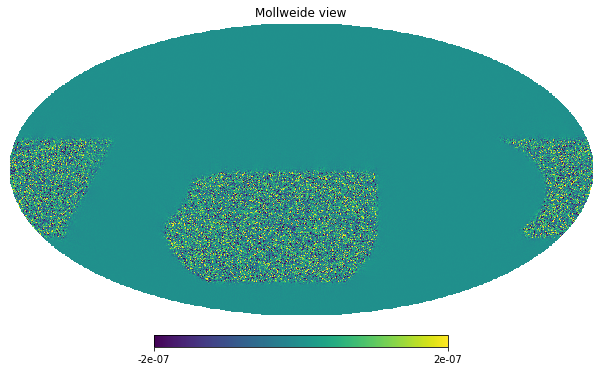

In [9]:
olmax = 1024
dalm = pickle.load(open(dobj['goal'].falm['comb'][1],"rb"))[0:olmax+1,0:olmax+1]
dmap = curvedsky.utils.hp_alm2map(256,olmax,olmax,dalm)
hp.mollview(dmap,min=-2e-7,max=2e-7)

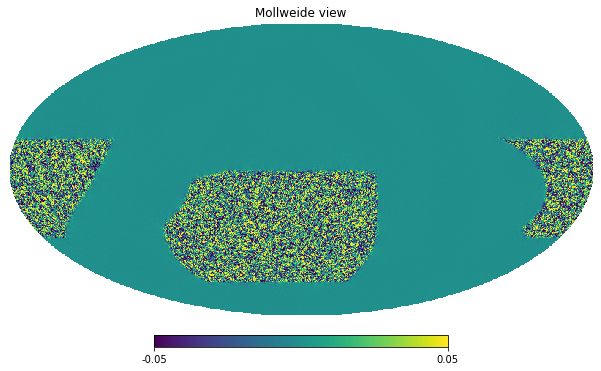

In [10]:
galm = pickle.load(open(mobj.fcklm[1],"rb"))[:olmax+1,:olmax+1]
gmap = curvedsky.utils.hp_alm2map(256,olmax,olmax,galm)
hp.mollview(gmap,min=-5e-2,max=5e-2)

In [11]:
palm = prjlib.load_input_plm(p.fpalm[1],olmax)

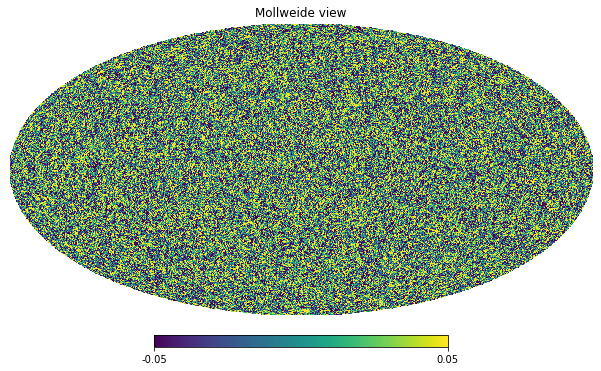

In [12]:
pmap = curvedsky.utils.hp_alm2map(256,olmax,olmax,palm*p.kL[:olmax+1,None])
hp.mollview(pmap,min=-5e-2,max=5e-2)